# Clasificación de dígitos escritos a mano utilizando la base de datos MNIST

El presente notebook busca realizar una comparación entre la implementación de algoritmos de machine learning y de deep learning para resolver una tarea de clasificación de imágenes a partir del dataset MNIST, el cual se compone de imágenes de números del 0 al 9 escritos a mano y digitalizados. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dentro de la carpeta `sample_data` del entorno de Colab se encuentra la base de datos MNIST.

In [2]:
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

## Visualización de datos

In [3]:
mnist_train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observamos que la lista de nombres de cada columna es también parte de la data, tanto para `mnist_train` como `mnist_test`.

In [5]:
# Obteniendo los valores
mnist1 = np.array([float(i) for i in mnist_train.columns])
mnist2 = np.array([float(i) for i in mnist_test.columns])

# Reemplazando las columnas
col1 = np.array(['digito'])
col2 = np.linspace(0, 783, 784)
col = np.concatenate([col1, col2])
mnist_train.columns = col
mnist_test.columns = col

# Insertando los valores
mnist_train = mnist_train.append(pd.DataFrame(mnist1.reshape(1,-1), columns=list(mnist_train)), ignore_index=True)
mnist_test = mnist_test.append(pd.DataFrame(mnist2.reshape(1,-1), columns=list(mnist_test)), ignore_index=True)

<ipython-input-5-6cd2bdd18154>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mnist_train = mnist_train.append(pd.DataFrame(mnist1.reshape(1,-1), columns=list(mnist_train)), ignore_index=True)
<ipython-input-5-6cd2bdd18154>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mnist_test = mnist_test.append(pd.DataFrame(mnist2.reshape(1,-1), columns=list(mnist_test)), ignore_index=True)


In [6]:
print('Dimensiones de mnist_train: {}'.format(np.shape(mnist_train)))
print('Dimensiones de mnist_test: {}'.format(np.shape(mnist_test)))

Dimensiones de mnist_train: (20000, 785)
Dimensiones de mnist_test: (10000, 785)


Obtenemos las etiquetas de los números.

In [7]:
y_train = mnist_train['digito'].to_numpy()
mnist_train = mnist_train.drop(['digito'], axis = 1)

y_test = mnist_test['digito'].to_numpy()
mnist_test = mnist_test.drop(['digito'], axis = 1)

Del dataframe anterior observamos que las 784 columnas restantes corresponden a la intensidad de los pixeles que componen cada imagen. Por lo tanto, trabajaremos utilizando un `resize` de (28,28). 

In [8]:
# Normalización de datos en función al máximo valor de intensidad
X1 = mnist_train.to_numpy() / 255.0
X2 = mnist_test.to_numpy() / 255.0

# reshape(28,28) para datos de entrenamiento
X_train = []
for i in range(np.shape(X1)[0]):
    X_train.append(mnist_train.iloc[i,:].to_numpy().reshape(28,28))
X_train = np.array(X_train)

# reshape(28,28) para los datos de test
X_test = []
for i in range(np.shape(X2)[0]):
    X_test.append(mnist_test.iloc[i,:].to_numpy().reshape(28,28))
X_test = np.array(X_test)

# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
  X_train = X_train[...,None]
  X_test = X_test[..., None]
  print(X_train.shape, X_test.shape)

(20000, 28, 28, 1) (10000, 28, 28, 1)


Evaluamos la distribución de clases.

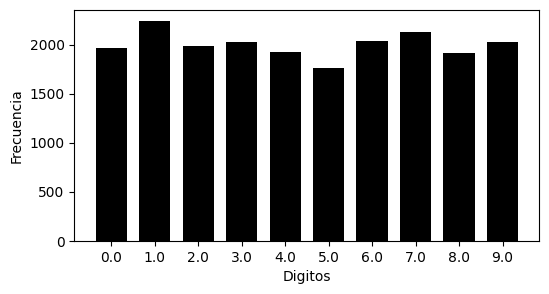

In [9]:
values, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize = (6,3))
plt.bar(x = np.linspace(0,10,10), height = counts, color = 'black')
plt.xlabel('Digitos')
plt.ylabel('Frecuencia')
plt.xticks(np.linspace(0,10,10), values)
plt.show()

Visualizamos la data

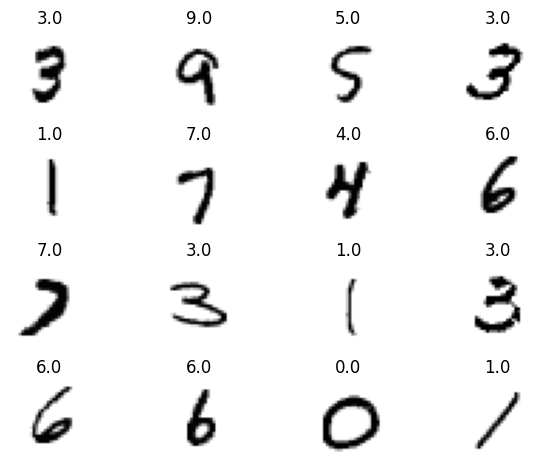

In [10]:
for i in range(16):
    plt.subplot(4,4, i+1)
    idx = np.random.choice(X_train.shape[0], 1)[0]
    plt.title('{}'.format(y_train[idx]))
    plt.imshow(-X_train[idx], cmap='gray') # para que sean letras negras sobre fondo blanco
    plt.axis('off')

plt.tight_layout()
plt.show()

## Implementación de algoritmos de machine learning

Previa implementación, podemos esperar de que, debido a la alta dimensionalidad de la data (como si tuvieramos "784 features"), es posible que los modelos de ML presenten *overfitting*.


In [12]:
"""
sklearn solicita que se realiza un "flatten" de la imagen. Es decir, que se
convierta cada imagen de formato (28,28,1) = (x,y,rgb) a (28*28*1) -> 1D
"""
muestras, dx, dy, rgb = np.shape(X_train)
x_train = X_train.reshape((muestras, dx*dy*rgb))

muestras, dx, dy, rgb = np.shape(X_test)
x_test = X_test.reshape((muestras, dx*dy*rgb))

In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

# SVM
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC()

Evaluamos las métricas de los modelos de machine learning.

In [14]:
clf = [rf_clf, knn_clf, svm_clf]
y_pred = [model.predict(x_test) for model in clf]
metrics = {'Accuracy':list(), 'F1 score':list(), 'Precision':list(), 'Recall':list()}

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

for j in range(len(y_pred)):
  metrics['Accuracy'].append(accuracy_score(y_test, y_pred[j]))
  metrics['F1 score'].append(f1_score(y_test, y_pred[j], average = 'weighted'))
  metrics['Precision'].append(precision_score(y_test, y_pred[j], average = 'weighted'))
  metrics['Recall'].append(recall_score(y_test, y_pred[j], average = 'weighted'))

df_metrics = pd.DataFrame(metrics)
df_metrics.insert(0, 'Clasificadores', ['Random Forest', 'KNN', 'SVM'])
df_metrics.set_index('Clasificadores', inplace=True)
print(df_metrics)

                Accuracy  F1 score  Precision  Recall
Clasificadores                                       
Random Forest     0.9596  0.959562   0.959622  0.9596
KNN               0.9591  0.959022   0.959560  0.9591
SVM               0.9700  0.969968   0.969982  0.9700


## Implementación de modelos de deep learning

In [15]:
import tensorflow as tf
from tensorflow import keras

### Multi-layer perceptron

In [16]:
# Será necesario incluir una operación de flatten para trabajar con imágenes
np.shape(X_train)

(20000, 28, 28, 1)

In [17]:
"""
La función loss será categorical_crossentropy, por lo que se realiza un encoding
del target utilizando tensorflow.keras.utils.to_categorical
"""
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [18]:
# Queremos que el input sea la imagen
flatten = tf.keras.layers.Flatten(input_shape=(28,28,1))
hidden1 = tf.keras.layers.Dense(units=200)
hidden2 = tf.keras.layers.Dense(units=150)

# y que el output sea una distribución de probabilidad
# donde la máxima probabilidad sea la predicción del modelo
output = tf.keras.layers.Dense(units=10, activation = 'softmax')
model = tf.keras.Sequential([flatten,hidden1,hidden2,output])

Podemos observar la estructura del modelo, la cual incluye una capa `flatten` que permite convertir la imagen en un vector 1D (de la misma forma como se realizó para la implementación de los modelos de ML), seguido de dos capas ocultas, y con una capa de 10 neuronas como output que permitirá estimar la probabilidad de los dígitos.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 188,660
Trainable params: 188,660
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [21]:
historia = model.fit(X_train, Y_train, batch_size = 3, epochs=20, verbose=False)

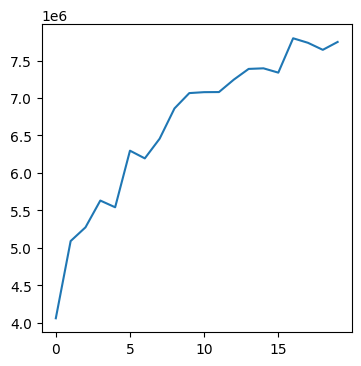

In [22]:
plt.figure(figsize = (4,4))
plt.plot(historia.history["loss"])
plt.show()

En este caso, aún es necesario optimizar los siguientes hiperparámetros:

* Número de capas ocultas y número de neuronas por capa
* `batch_size` y `epochs`, para controlar el overfitting de acuerdo a cuántas muestras utiliza el modelo para aprender, y el número de iteraciones que realiza, respectivamente
* `learning_rate` y `loss`, los cuales se asumen que no son óptimos porque el valor de pérdida sube en vez de disminuir

Aún así, podemos evaluar el rendimiento del modelo en base a las predicciones que realiza.

In [23]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 8789437.0000 - accuracy: 0.8593


También podemos evaluar las predicciones visualmente.

1/1 [==============================] - 0s 18ms/step


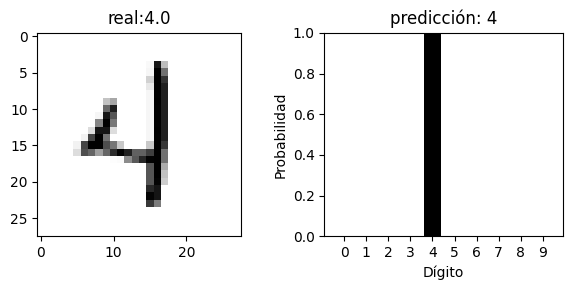

In [51]:
#@title Evaluando las predicciones
# Obtenemos una imagen aleatoria
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]

# Realizamos la predicción
salida = model.predict(im[None,:,:,:])[0]

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (6,3))
ax[0].title.set_text('real:{}'.format(label ))
ax[0].imshow(-im[:,:,0], cmap='gray')

ax[1].title.set_text("predicción: {}".format(salida.argmax()))
ax[1].set_ylabel("Probabilidad")
ax[1].set_xlabel("Dígito")
plt.ylim([0,1])
plt.bar(np.arange(10), salida, color = 'black')
ax[1].set_xticks(np.arange(10), range(10))

plt.tight_layout()
plt.show()

### Convolutional neural network 

La literatura recomienda utilizar una red neuronal denominada *convolutional neural network* o CNN para la tarea de clasificación de imágenes (resumiedo en la revisión de [Alzubaidi et al](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00444-8) del 2021). Por lo tanto, se busca comparar el rendimiento del multi-layer perceptron implementado con un algoritmo de CNN extraido de la documentación de `tensorflow`.

In [40]:
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential

lr = 0.1 

n_filters_1 = 16 
filter_size_1 = 3 
activation_1 = "relu" 

n_filters_2 = 16 
filter_size_2 = 3 
activation_2 = "relu" 

n_filters_3 = 16 
filter_size_3 = 3 
activation_3 = "relu"

n_filters_fc = 16 
activation_fc = "relu" 

model_cnn = Sequential([Conv2D(n_filters_1, filter_size_1, activation=activation_1, input_shape=(28,28,), padding='same'),
                    MaxPool2D(),
                    Conv2D(n_filters_2, filter_size_2, activation=activation_2, padding='same'),
                    MaxPool2D(),
                    Conv2D(n_filters_3, filter_size_3, activation=activation_3, padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(n_filters_fc, activation=activation_fc),
                    Dense(10, activation='softmax')])

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [281]:
log = model_cnn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose = False)

In [ ]:
plt.figure(figsize = (4,4))
plt.plot(log.history["loss"])
plt.show()

In [ ]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)

## Discusión 

1. Los algoritmos de deep learning necesitan de una gran base de datos para obtener un rendimiento adecuado, comparable con los de machine learning. Esto no pudo ser evidenciado en este notebook porque el dataset MNIST tiene suficientes datos, pero ha sido reportado en artículos (*A Survey on Deep Learning in Big Data* - [IEEE Xplore](https://ieeexplore.ieee.org/abstract/document/8005992?casa_token=5w6DHEUdJX8AAAAA:gJ1tBikvmEtdveI19fmAjWLjfINMbT3LSjm_SZJXIA4JLDiZpGunkCiGm4bOVK6o6K-jDODetO0))


In [25]:
np.shape(X_train) # 20 000 datos de entrenamiento

(20000, 28, 28, 1)

2. La mayoría de algoritmos de machine learning son interpretables, en el sentido que uno puede conocer los features más importantes para tomar la decisión de clasificación (e.g `RandomForestClassifier.feature_importances_`). En el caso de los modelos de deep learning, uno puede interpretar hasta cierto punto las operaciones del modelo a partir de su estructura y el peso asignado a cada neurona. Sin embargo, cuando el perceptron tiene muchas capas ocultas (es "denso"), deja de ser fácilmente interpretable.

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 188,660
Trainable params: 188,660
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_cnn.summary() # una vez que se haya ejecutado model_cnn.fit()

3. Al intentar aumentar el rendimiento del multi-layer perceptron, agregar más neuronas causar overfitting, por lo que se prefiere balancear entre la cantidad de capas y de neuronas por capa. Sin embargo, mientras más capas ocultas presente el modelo, menos interpretable será.

In [49]:
model.get_weights()

[array([[  0.04759708,   0.04033107,  -0.03967507, ...,   0.07212864,
           0.02879192,  -0.06235757],
        [-25.036907  ,  -5.9441133 , -18.152876  , ...,  -7.8470297 ,
          -0.43913305, -19.344263  ],
        [-25.13041   ,  -5.851384  , -18.174099  , ...,  -7.804013  ,
          -0.37623703, -19.264761  ],
        ...,
        [-25.108856  ,  -5.947835  , -18.157278  , ...,  -7.7469287 ,
          -0.35612616, -19.201897  ],
        [-25.16397   ,  -5.9040875 , -18.240194  , ...,  -7.7434597 ,
          -0.45395738, -19.333801  ],
        [-25.077976  ,  -5.9726505 , -18.164204  , ...,  -7.7427335 ,
          -0.3909307 , -19.240305  ]], dtype=float32),
 array([ 6.63397121e+00,  8.65822124e+00,  2.01710453e+01,  8.17912598e+01,
        -5.41523647e+00, -2.66601925e+01,  1.13930206e+02, -1.85789623e+01,
         1.24534359e+01, -3.34560013e+01, -8.58033085e+00,  7.44597673e-01,
        -1.89377880e+01,  3.70853394e-02,  6.40130615e+00,  1.76578693e+01,
        -6.5594663

## Conclusión

La aplicación de algoritmos de machine learning o deep learning depende del problema que se desee resolver y del tipo de base de datos que se tenga, por lo que no puede definirse un criterio de elección absoluto. En el caso de clasificación de imágenes, los algoritmos de deep learning presentan ventajas con respecto a los de machine learning en cuestión de métricas de rendimiento, pero necesitan de una base de datos más grande, y son computacionalmente más demandantes.